In [4]:
import pandas as pd

# Load the dataset
data = pd.read_csv('Housing.csv')

# Display the first few rows
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [5]:
# Check for missing data
print(data.isnull().sum())

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


In [7]:
# Removing rows with missing values
data = data.dropna()

# Or fill missing values with the mean or median
data.fillna(data.mean(), inplace=True)
data.isnull().sum()

C:\Users\user\AppData\Local\Temp\ipykernel_20288\1564172109.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.fillna(data.mean(), inplace=True)


price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [10]:
from sklearn.preprocessing import LabelEncoder

# Initialize the encoder
encoder = LabelEncoder()

# Convert categorical columns to numerical
categorical_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 
                       'airconditioning', 'parking', 'prefarea', 'furnishingstatus']
for col in categorical_columns:
    data[col] = encoder.fit_transform(data[col])

# Display the first few rows after transformation
data.head()



,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0


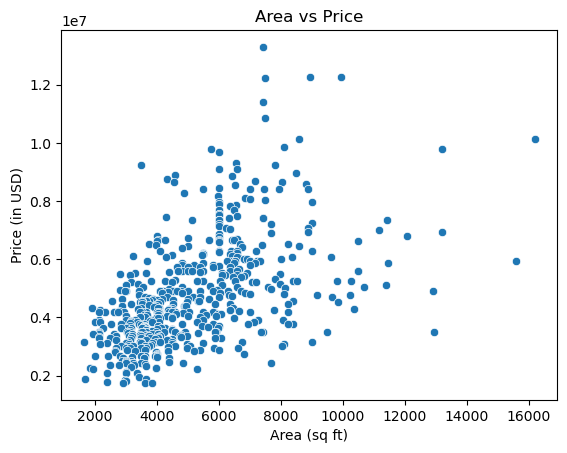

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot of area vs price
sns.scatterplot(data=data, x='area', y='price')
plt.title('Area vs Price')
plt.xlabel('Area (sq ft)')
plt.ylabel('Price (in USD)')
plt.show()


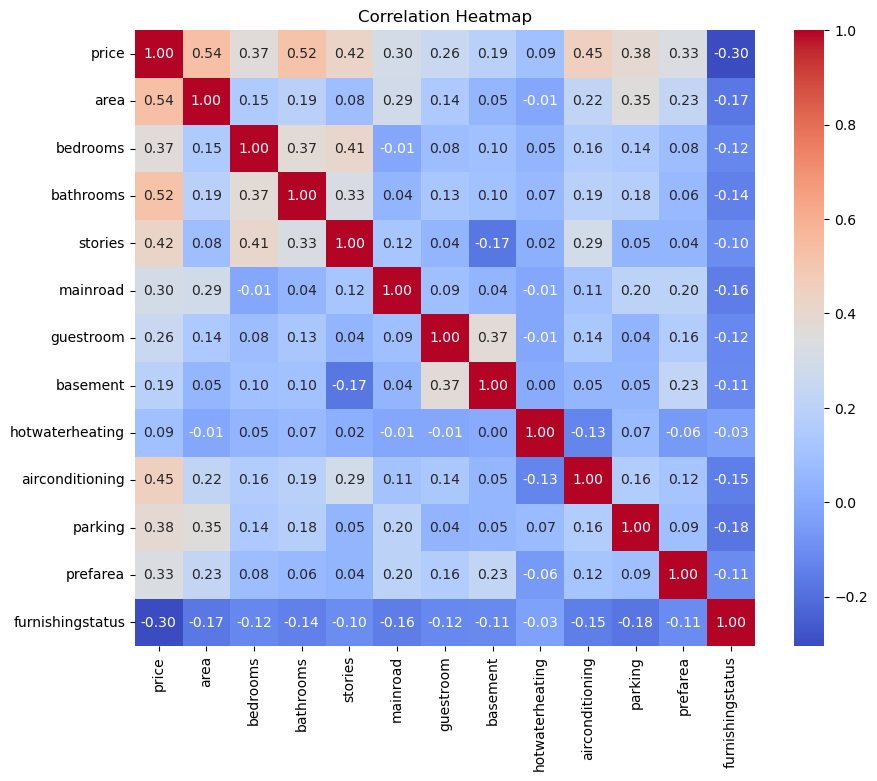

In [12]:
# Correlation heatmap
correlation = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


In [13]:
from sklearn.model_selection import train_test_split

# Define the features (X) and target (y)
X = data.drop('price', axis=1)  # Features
y = data['price']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'Training set size: {len(X_train)}')
print(f'Testing set size: {len(X_test)}')


Training set size: 436
Testing set size: 109


In [14]:
from sklearn.linear_model import LinearRegression

# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)


LinearRegression()

In [15]:
# Make predictions
predictions = model.predict(X_test)

# Display the first few predictions
print(predictions[:5])


[5203691.70963178 7257004.02115476 3062828.59668171 4559591.65374424
 3332932.30559782]


In [16]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate MSE and R-squared
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 1771751116594.034
R-squared: 0.6494754192267806


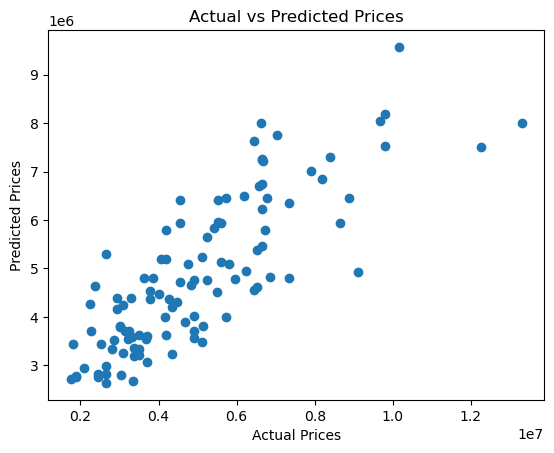

In [17]:
# Plotting actual vs predicted prices
plt.scatter(y_test, predictions)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()


In [20]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# Sample data
data = {
    'area': [1500, 1800, 2400, 3000],
    'bedrooms': [3, 4, 3, 5],
    'bathrooms': [2, 3, 2, 4],
    'price': [400000, 500000, 600000, 700000]
}

df = pd.DataFrame(data)
df

,area,bedrooms,bathrooms,price
0,1500,3,2,400000
1,1800,4,3,500000
2,2400,3,2,600000
3,3000,5,4,700000


In [21]:
# Define features and target variable
X = df[['area', 'bedrooms', 'bathrooms']]  # Features
y = df['price']  # Target (Price)

# Train the model
model = LinearRegression()
model.fit(X, y)

new_house = [[2000, 3, 2]]  
predicted_price = model.predict(new_house)
print(f"Predicted Price: ${predicted_price[0]:,.2f}")

Predicted Price: $514,444.44


C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
!pip install sketch

In [40]:
import pandas as pd
import sketch

In [48]:
import pandas as pd
import sketch as sk
data = pd.read_csv('Housing.csv')

# Display the first few rows
data


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [47]:
q = 'whats the dimension of my dataset?'
data.sketch.ask(q)

In [46]:
q = 'how to plot a chart of bedroom and price'
data.sketch.howto(q)


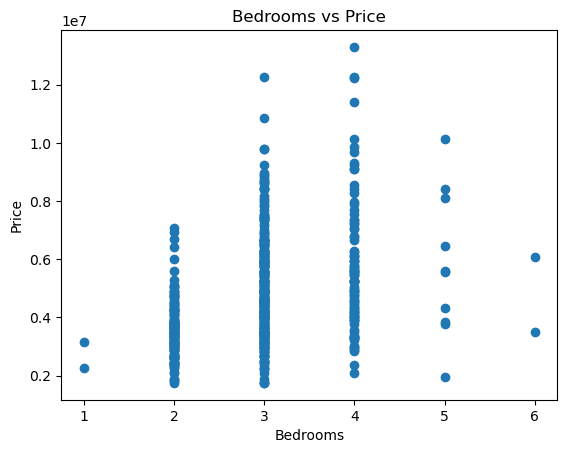

In [49]:
import matplotlib.pyplot as plt

# create a scatter plot of bedrooms vs price
plt.scatter(data['bedrooms'], data['price'])

# add labels and title
plt.xlabel('Bedrooms')
plt.ylabel('Price')
plt.title('Bedrooms vs Price')

# display the plot
plt.show()


In [50]:
import folium

# Create a map centered around New York City
m = folium.Map(location=[40.7128, -74.0060], zoom_start=12)

# Add a marker for a specific store
folium.Marker([40.748817, -73.985428], popup="Store 1: $5000 Sales").add_to(m)

# Display the map
m


In [ ]:
Age = int(input("What is your Age"))
print("My Age is  " + Age)

In [ ]:
!pip install pandas numpy matplotlib seaborn